**Ridge and Lasso Regression**

**(Code: Subhajit Das)**

**What is Ridge and Lasso Regression?**

**Ridge Regression** and **Lasso Regression** are two types of regularized linear regression methods that are used to prevent overfitting.

1. **Ridge Regression**: It is an adaptation of the popular and widely used linear regression algorithm. It enhances regular linear regression by slightly changing its cost function, which results in less overfit models. Ridge regression is a method of estimating the coefficients in scenarios where the independent variables are highly correlated². It has been used in many fields including econometrics, chemistry, and engineering.

2. **Lasso Regression**: Lasso (Least Absolute Shrinkage and Selection Operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage, where data values are shrunk towards a central point as the mean.

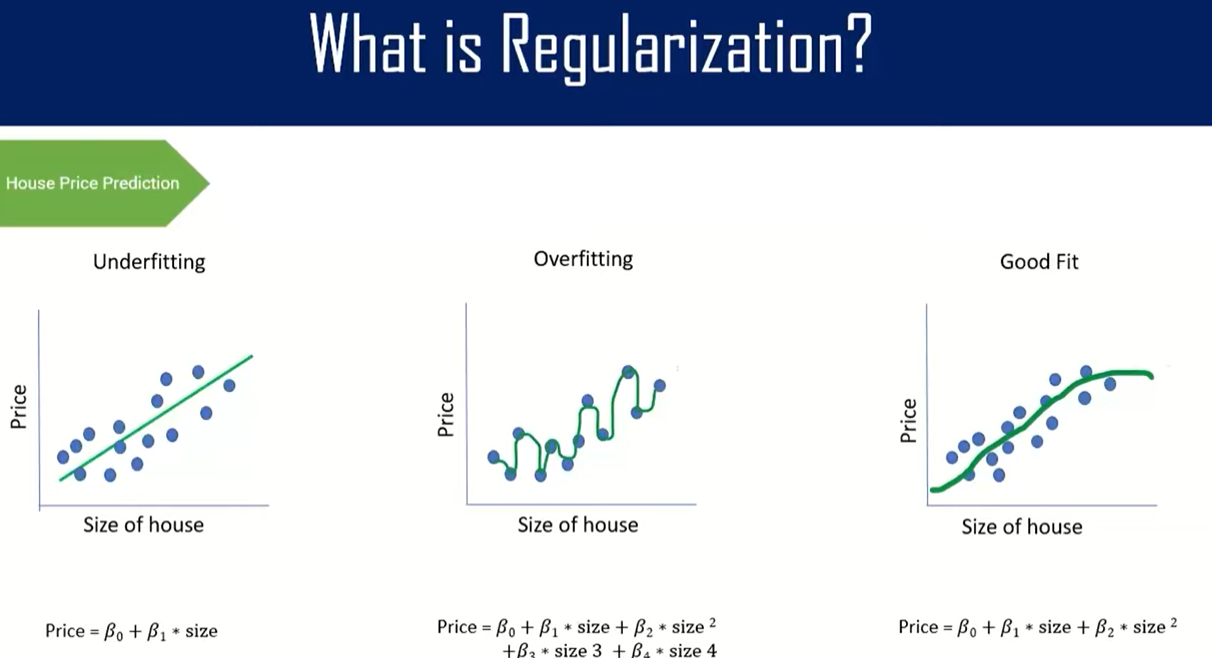

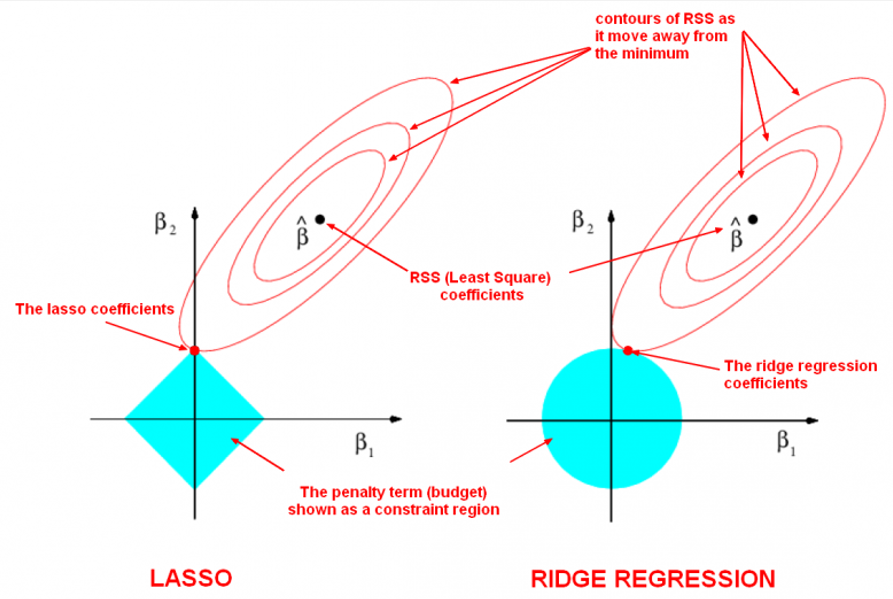

**Where we can use Ridge and Lasso Regression?**

Ridge and Lasso Regression are used in various fields for different applications:

**Ridge Regression**:
1. **Multicollinearity**: Ridge regression is a machine learning instrument that helps to analyze multiple regression data sets with multicollinearity.
2. **Creating Parsimonious Models**: It is used for the purpose of creating parsimonious models when the number of predictor variables in a given set exceeds the number of observations or when the dataset has multicollinearity.
3. **Mitigating Overfitting**: Ridge regression is a powerful technique for mitigating overfitting in machine learning models.
4. **Econometrics, Chemistry, and Engineering**: It has been used in many fields including econometrics, chemistry, and engineering.

**Lasso Regression**:
1. **Shrinkage or Regularization**: Lasso regression is used to shrink or regularize coefficients to avoid overfitting and make them work better on different datasets.
2. **High Multicollinearity**: This type of regression is used when the dataset shows high multicollinearity.
3. **Automate Variable Elimination and Feature Selection**: It is used when you want to automate variable elimination and feature selection.
4. **Constructing Forecasting Models**: Lasso regression is used in constructing forecasting models of sectoral probabilities of default in an advanced emerging market economy.

Both methods are particularly useful when dealing with datasets where features are correlated.

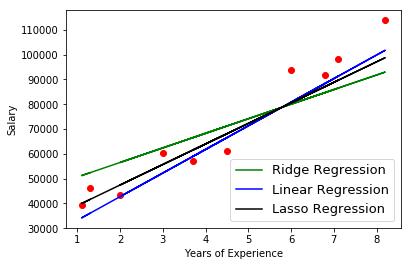

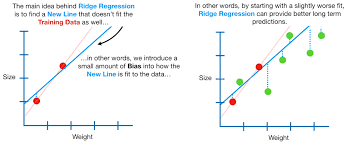

**How Ridge and Lasso Regression works:**

**Ridge Regression**:
1. **Linear Regression**: Ridge regression is an adaptation of linear regression.
2. **Cost Function**: It enhances regular linear regression by slightly changing its cost function, which results in less overfit models.
3. **Highly Correlated Variables**: Ridge regression is a method of estimating the coefficients in scenarios where the independent variables are highly correlated.
4. **Many Fields**: It has been used in many fields including econometrics, chemistry, and engineering.

**Lasso Regression**:
1. **Variable Selection and Regularization**: Lasso (Least Absolute Shrinkage and Selection Operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.
2. **Regularization Technique**: Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction.
3. **Shrinkage**: This model uses shrinkage, where data values are shrunk towards a central point as the mean.

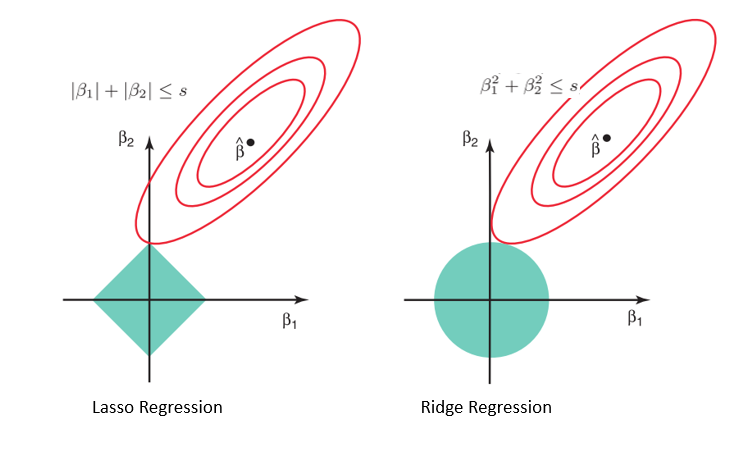

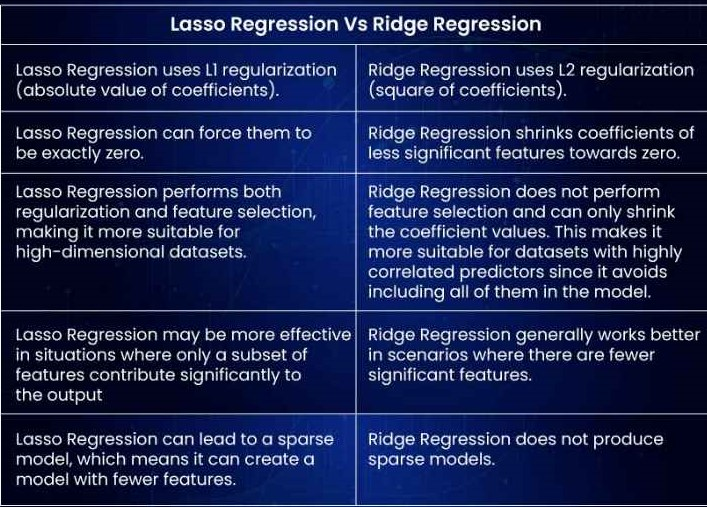

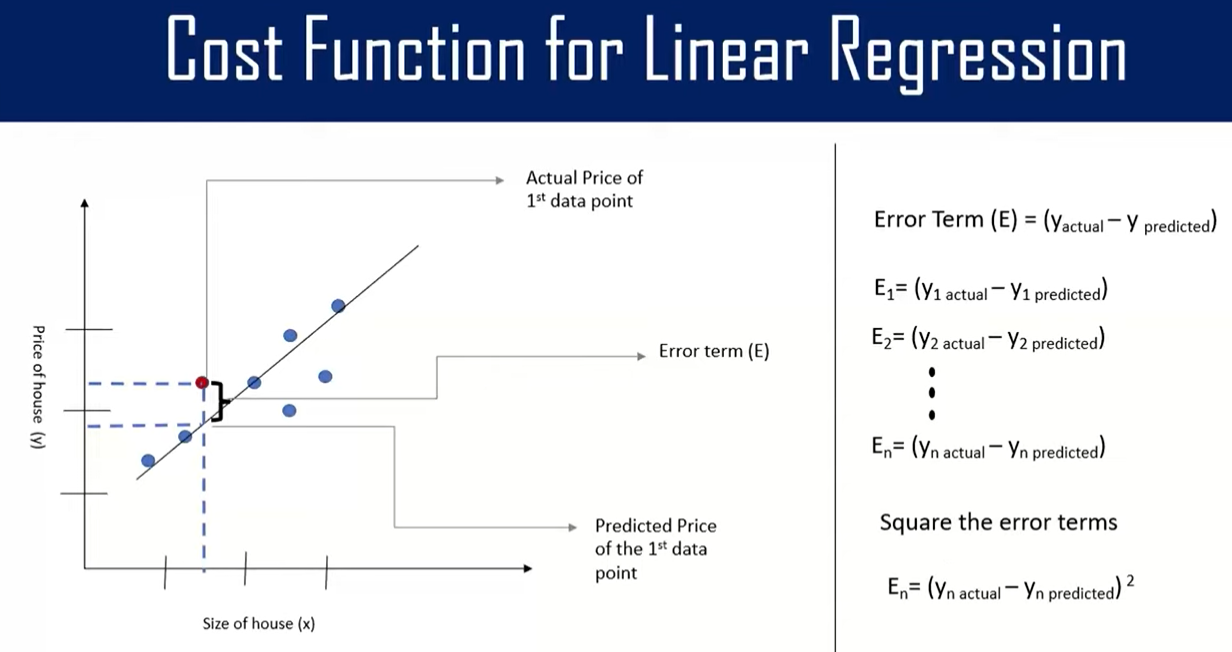

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Auto-mpg Dataset**

In [ ]:
auto_df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/13_auto-mpg.csv")
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

**Data Cleaning (Horsepower)**

In [ ]:
# Viwing the abnormal horsepower data
auto_df[auto_df.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# Replace ? with nan
# Replaces all instances of ‘?’ in the ‘horsepower’ column with np.nan (which stands for ‘Not a Number’ and is used to denote missing values)
auto_df['horsepower'] = auto_df['horsepower'].replace('?', np.nan)

In [ ]:
# Filling with median value
auto_df['horsepower'] = auto_df['horsepower'].fillna(auto_df['horsepower'].median())

In [ ]:
# Viewing the dataset
auto_df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


**Data Visualizations**

<ipython-input-9-870524a27db6>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_df['horsepower']) # sns.distplot() automatically removes NaN values and can handle non-numeric values better. In histplot() it can raise Type Error


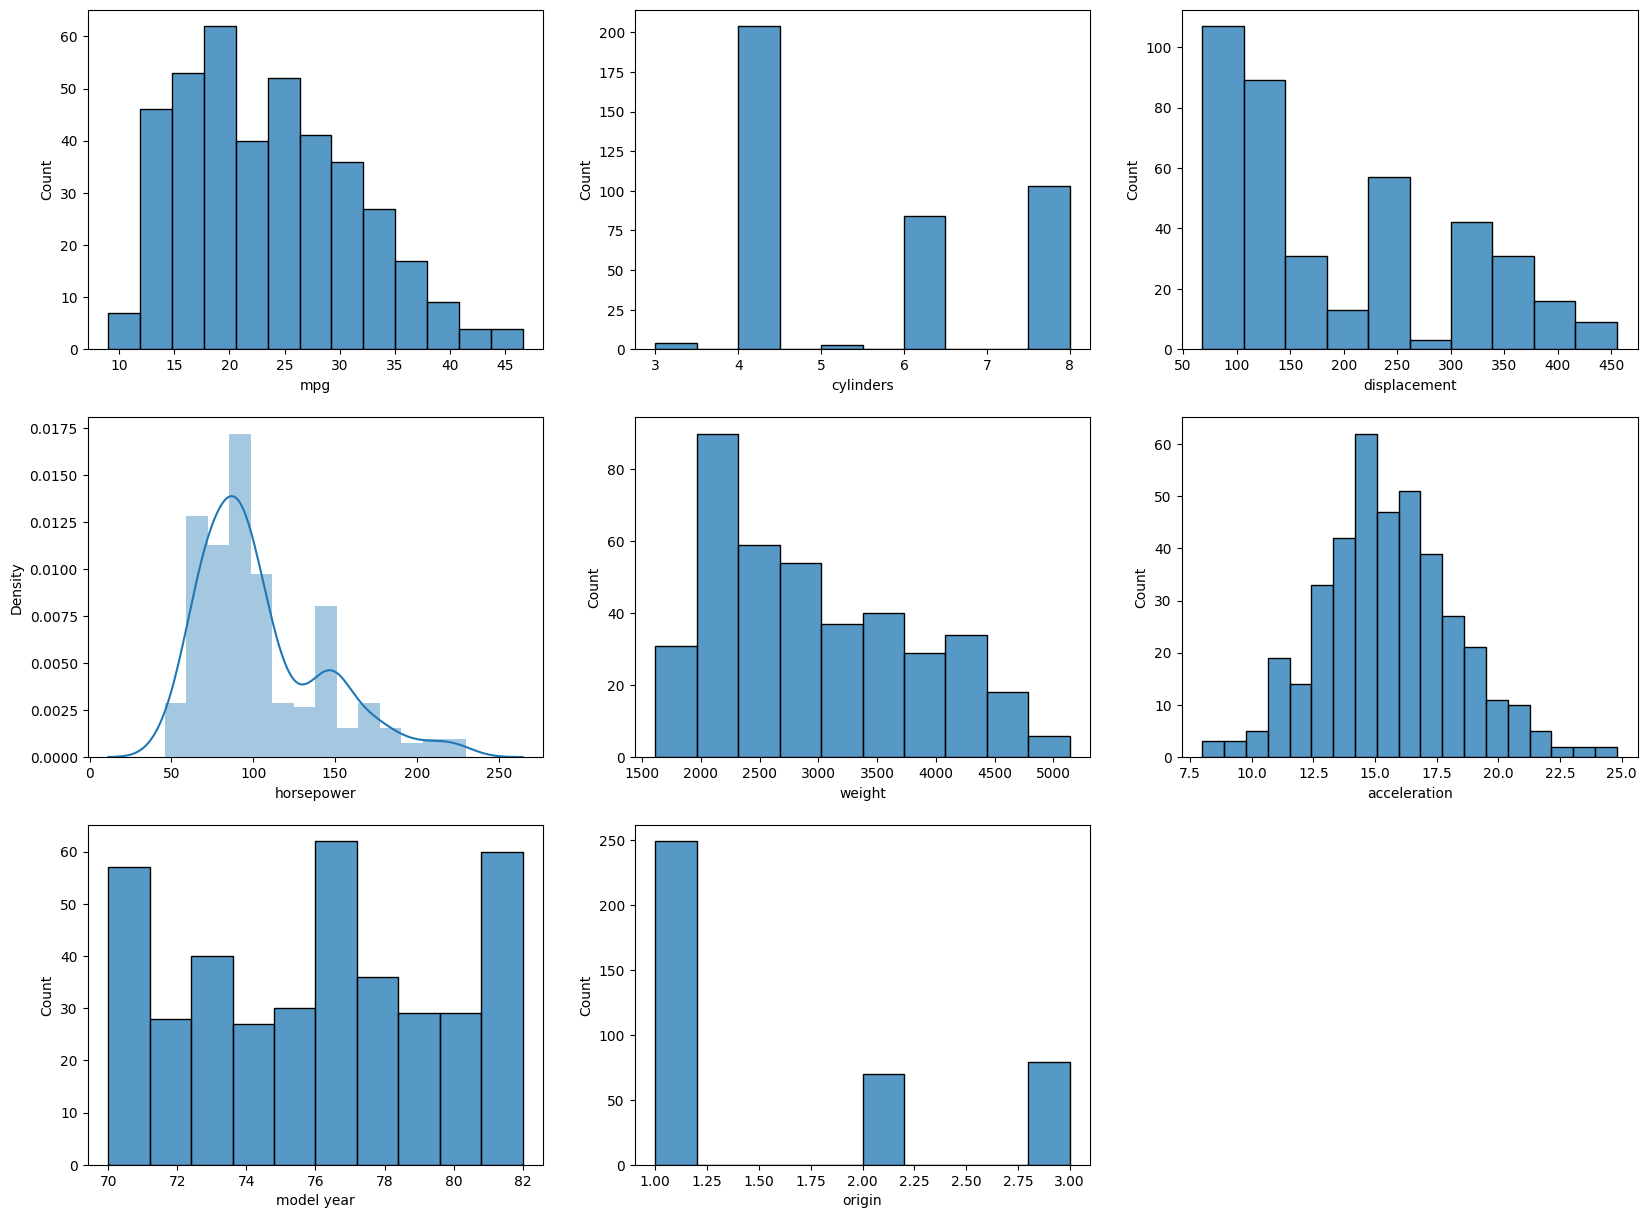

In [ ]:
plt.figure(figsize = (20, 15))

plt.subplot(3, 3, 1)
sns.histplot(auto_df['mpg'])

plt.subplot(3, 3, 2)
sns.histplot(auto_df['cylinders'])

plt.subplot(3, 3, 3)
sns.histplot(auto_df['displacement'])

plt.subplot(3, 3, 4)
sns.distplot(auto_df['horsepower']) # sns.distplot() automatically removes NaN values and can handle non-numeric values better. In histplot() it can raise Type Error

plt.subplot(3, 3, 5)
sns.histplot(auto_df['weight'])

plt.subplot(3, 3, 6)
sns.histplot(auto_df['acceleration'])

plt.subplot(3, 3, 7)
sns.histplot(auto_df['model year'])

plt.subplot(3, 3, 8)
sns.histplot(auto_df['origin'])

plt.show()

<Axes: >

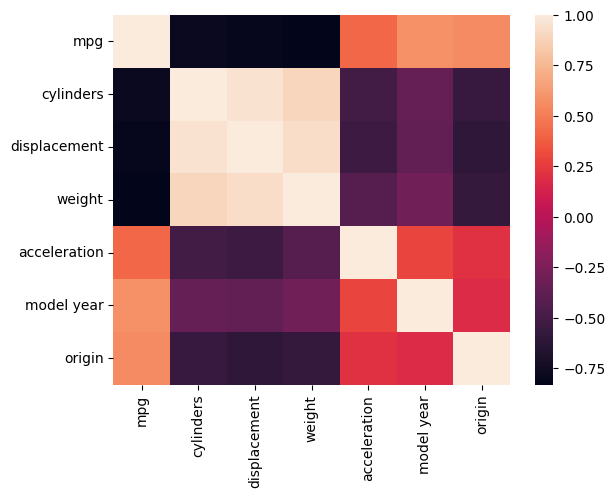

In [ ]:
# Building the Correlation Matrix
# Creating a heatmap of the correlation matrix of the DataFrame. This can be very useful for visualizing the relationships between different variables in the DataFrame.
sns.heatmap(auto_df.corr(numeric_only=True)) # More closer to 1, it denotes more connection or correlation

In [ ]:
auto_df.corr()

<ipython-input-11-4682980c0113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto_df.corr()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


**Pre-processing**

In [ ]:
auto_df = auto_df.drop('car name', axis = 1)
auto_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1
397,31.0,4,119.0,82,2720,19.4,82,1


In [ ]:
auto_df.shape

(398, 8)

**Separating features and labels**

In [ ]:
x = auto_df.drop(['mpg'], axis = 1)
x.tail()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1
397,4,119.0,82,2720,19.4,82,1


In [ ]:
y = auto_df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

**Scaling the data**

In [ ]:
# The preprocessing.scale function in the sklearn.preprocessing module is used to standardize a dataset along any axis
''' This function is helpful with largely sparse datasets. It subtracts the mean and divides by the standard deviation of your dataset along a given axis.
     This brings all your values onto one scale, eliminating the sparsity. It follows the same concept of Normalization and Standardization '''
from sklearn import preprocessing

In [ ]:
# Scaling the columns of data
x_scaled = preprocessing.scale(x)

y_scaled = preprocessing.scale(y)

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**Using Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin = LinearRegression()

In [ ]:
# Fit the model
lin.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_train.head(6)

240    30.5
323    27.9
150    26.0
11     14.0
151    31.0
348    37.7
Name: mpg, dtype: float64

In [ ]:
y_pred = lin.predict(x_train)
print(y_pred)

[28.53490984 26.28613872 26.50726894 13.67984538 27.86063695 34.47252849
 13.85360683 28.19751439 35.96067005 20.94517545 24.44819919 12.0869313
 23.41305456 14.46977584 32.99884688 32.03563901  9.19608154 30.28331467
 34.02618318 27.21622859 25.29523263 31.15779505 16.90882141 25.8421224
 22.64339605 18.54382513 28.14747579 31.91500348 22.01769412 31.95606783
 35.33830173 10.17098932 18.33366776 19.82757819 30.52249937  6.19954595
 27.03106362 26.22440974 26.93472562 14.7395863  13.29147787 34.54278193
 32.34542217 28.996812   30.54979055 26.70805776 15.5321049  13.36762781
  9.75613138 21.29843217 17.41583521 17.05760572 27.40068432 24.28166699
 28.87878367 29.26944875 15.46962744 26.41373483 11.27056568 10.41112511
 29.95513157 25.25601398 20.38086796 29.55960944 26.04146212 29.16379389
 22.04034527 32.97239378 26.69021878 21.39534528 25.51979664 28.9345504
 21.57474056 14.8582928  23.9343194  17.41653346 28.81759963 25.07938803
 16.56339474 21.33418477 29.27008606 25.13017534 24.53

In [ ]:
y_test.head(6)

292    18.5
126    21.0
273    23.9
116    16.0
331    33.8
335    35.0
Name: mpg, dtype: float64

In [ ]:
y_pred = lin.predict(x_test)
print(y_pred)

[19.74811136 22.41832206 29.30880283 11.16564753 33.35607929 29.22824733
 24.56772491 10.48206356 28.91259555 17.78493535 23.22890722 35.3715484
 22.04959799 27.21599107 12.9721788  27.02740383 24.91065367 25.68071581
 20.37590151 22.47318453 29.5178074  23.98293056 27.04789403 25.65747649
 23.21775326 21.14736844 13.71448257 24.69620349 33.59046558 35.14677951
 19.82710107 11.69526319 20.55529118 30.24274267 30.39944513 27.03003703
 36.15472598 25.00232736 23.68744254 10.20085691 26.35375803 14.75228637
 22.62868821 25.0047747  24.02661471 24.38207978 26.86786396 23.42022823
 19.11105447 25.47284241 24.77565884 30.7131393  19.82153565 28.59873753
 30.03701073 22.2219976  12.23169375 13.93826403 29.56654497 12.42222198
 23.64427896 17.06647607 23.58783071 14.60981599 23.46560036 29.92966684
 10.02071088 21.46313241 35.61460532 29.48268049 22.24799085 22.060838
 20.05485101 28.80092479 28.18360275 22.69992163 30.97439779 15.08291952
 32.70066505 16.08417777 21.71089449 28.09681809 20.68

In [ ]:
# Finding m / slope of line
for m, col_name in enumerate(x_train):
    print("The coefficient for {} is {}".format(col_name, lin.coef_[m]))
# In this case, a coefficient of -0.63.. means that for every one unit increase in the independent var, the dependent var is expected to decrease by approximately 0.636

The coefficient for cylinders is -0.679346387332016
The coefficient for displacement is 0.029875991756258456
The coefficient for horsepower is -0.033465375138656085
The coefficient for weight is -0.006522805022109741
The coefficient for acceleration is 0.1928289231949515
The coefficient for model year is 0.7034440270134991
The coefficient for origin is 1.2971592068824689


In [ ]:
# Finding y_intercept of model
# The y-intercept of a linear regression model, also known as the bias or constant, is the value of the dependent variable when all independent variables are equal to zero.
c = lin.intercept_
print('The y_intercept of this Linear Regression is {}'.format(c))
# y-intercept of -16.54 means that if all the independent var in your model were set to zero, the model would predict the dependent var to be approx -16.54

The y_intercept of this Linear Regression is -14.228829857898504


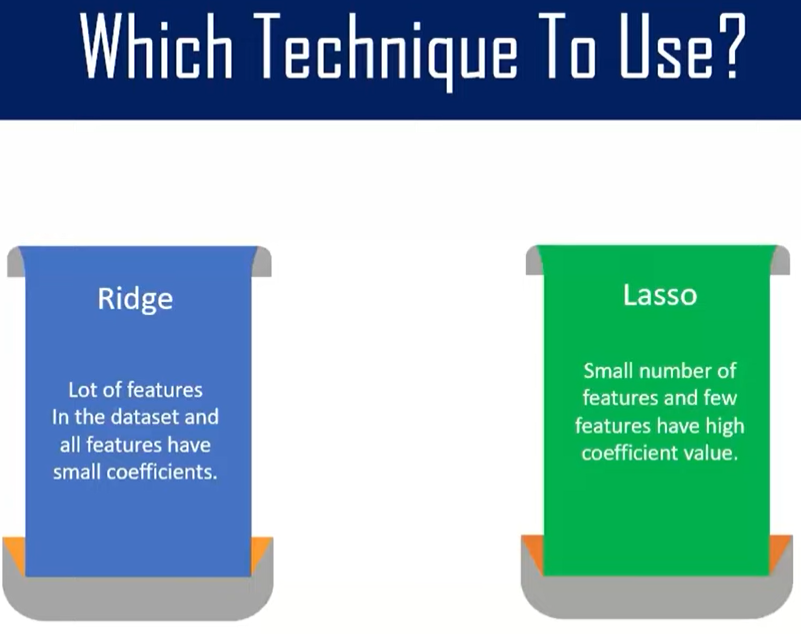

**Parameters used in Ridge and Lasso Regression:**

The parameters used in Ridge and Lasso Regression include:
1. **Dependent Variable (Y)**: This is the variable that we want to predict or forecast.
2. **Independent Variables (X)**: These are the variables that we use to predict or forecast the dependent variable.
3. **Intercept (b0)**: This is the predicted value of Y when X is 0.
4. **Slope (b1)**: This is the regression coefficient, which represents the change in the dependent variable for a unit change in the independent variable.
5. **Error Term (ϵ)**: This is the difference between the observed and predicted values.
6. **alpha**: This is a regularization parameter that controls the strength of the penalty term.
7. **fit_intercept**: This specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
8. **normalize**: This parameter is used to normalize the input variables (X) before regression.
9. **copy_X**: This parameter is used to copy the input variables (X). If False, the input variables may be overwritten during the normalization process.
10. **max_iter**: This is the maximum number of iterations for the solver to converge.
11. **tol**: This is the tolerance for the solution.
12. **warm_start**: When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
13. **positive**: When set to True, forces the coefficients to be positive.
14. **random_state**: This parameter is used for shuffling the data.
15. **selection**: If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default.

**Implementing Ridge Regression (L2) [Reduce Overfiting]**

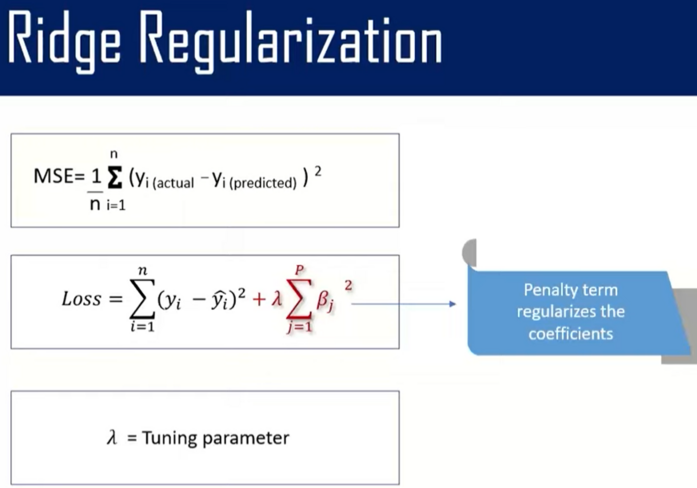

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Alpha is the regularization strength. It improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
rid = Ridge(alpha = 0.4) # The default value is 1.0, but you might need to tune it for optimal results

In [ ]:
# Fit the model
rid.fit(x_train, y_train)

Ridge(alpha=0.4)

In [ ]:
y_pred_rid = rid.predict(x_test)
print(y_pred_rid)

[19.74615416 22.42274078 29.30252987 11.1653999  33.35008765 29.22612737
 24.57144764 10.48303769 28.91720204 17.78316309 23.23342328 35.36615773
 22.04629884 27.21539006 12.97598077 27.0212687  24.91254406 25.67923986
 20.37829171 22.46986068 29.50871845 23.98235584 27.04043377 25.6573163
 23.21750628 21.14632497 13.71805231 24.69574181 33.58940592 35.14198401
 19.83262749 11.69878879 20.5544918  30.24387606 30.40008207 27.02669369
 36.15051501 25.00671146 23.69077975 10.19985767 26.36001612 14.75457798
 22.63064221 25.00730015 24.03358605 24.37637196 26.86701445 23.42167724
 19.10903955 25.4649236  24.77704476 30.70619866 19.81964741 28.59862554
 30.03307729 22.22090788 12.23129461 13.94004862 29.57118831 12.41690501
 23.64455789 17.07185734 23.58561779 14.61501383 23.46864333 29.92282523
 10.01367787 21.46382767 35.60932638 29.48460498 22.24865698 22.05827366
 20.05881558 28.80471509 28.18439721 22.70162971 30.98023414 15.0823848
 32.70375234 16.08605814 21.712371   28.10181253 20.6

In [ ]:
# Finding m / slope of line
for m, col_name in enumerate(x_train):
    print("Ridge model coefficient for {} is {}".format(col_name, rid.coef_[m]))
# Coefficient of 0.020 means that for every one unit increase in the ind var, the depend var is expected to increase by approx 0.0201, assume all other var remain constant
# In ridge regression coefficient can't be zero

Ridge model coefficient for cylinders is -0.6751253889822624
Ridge model coefficient for displacement is 0.029774473258055555
Ridge model coefficient for horsepower is -0.03339760977219361
Ridge model coefficient for weight is -0.00652452195552349
Ridge model coefficient for acceleration is 0.19280010448618864
Ridge model coefficient for model year is 0.7033059366008064
Ridge model coefficient for origin is 1.2916467139033134


In [ ]:
# Finding y_intercept of model
c = rid.intercept_
print('The y_intercept of this Ridge Regression is {}'.format(c))

The y_intercept of this Ridge Regression is -14.214612196732098


In [ ]:
''' Here we can see, there is no huge differance in co-eddicient of Linear and Ridge(L2) Regression '''

' Here we can see, there is no huge differance in co-eddicient of Linear and Ridge(L2) Regression '

**Implementing Lasso Regression (L1) [Feature Selection]**

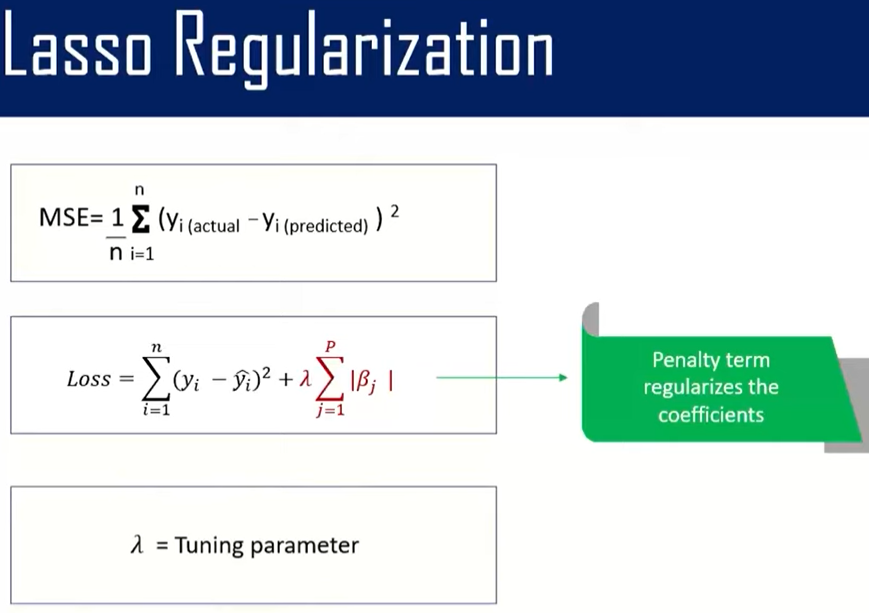

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Alpha is the regularization strength. It improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
las = Lasso(alpha = 0.4) # The default value is 1.0, but you might need to tune it for optimal results

In [ ]:
# Fit the model
las.fit(x_train, y_train)

Lasso(alpha=0.4)

In [ ]:
y_pred_las = las.predict(x_test)
print(y_pred_las)

[19.2126628  23.19812449 28.05051845 10.99611689 31.9106092  28.92706139
 25.53787201 10.69968835 30.28699481 17.61753592 24.38616798 33.93121197
 21.19635501 26.65502658 13.55226498 25.67520339 25.21587569 25.30856816
 20.82915178 21.62647509 27.75827052 24.12698079 25.40680854 25.76506355
 23.56220043 20.95370599 14.43793786 24.44039824 32.94446349 33.72275513
 21.00600168 12.29714484 20.30603781 30.58211682 30.44736976 26.26528966
 35.08204849 25.82241572 24.60145793 10.10320929 27.30499517 15.22746515
 23.06439795 25.80987343 25.74024377 23.44163911 26.89067866 23.64986201
 18.56760041 24.21484425 25.29554561 29.3176094  19.37460668 28.85158835
 29.01326229 22.0193104  12.23381564 14.29184981 30.7489456  11.58044626
 23.5939624  17.75631325 23.01927812 15.71272613 24.01038863 28.5635979
  8.88579946 21.56709728 34.23939211 30.2742995  22.4250748  21.83162229
 20.69247937 29.40935673 28.19570039 23.01856855 32.36667992 15.0124885
 32.91739353 16.40041962 22.11585873 29.40568494 20.5

In [ ]:
# Finding m / slope of line
for m, col_name in enumerate(x_train):
    print("Lasso model coefficient for {} is {}".format(col_name, las.coef_[m])) # 0 means that feature is not so much corelated in this model

Lasso model coefficient for cylinders is -0.0
Lasso model coefficient for displacement is 0.009480059923844144
Lasso model coefficient for horsepower is -0.027364135720170345
Lasso model coefficient for weight is -0.006486451078414584
Lasso model coefficient for acceleration is 0.08095778709571876
Lasso model coefficient for model year is 0.655140788339108
Lasso model coefficient for origin is 0.10843474338531872


In [ ]:
# Finding y_intercept of model
c = las.intercept_
print('The y_intercept of this Lasso Regression is {}'.format(c))

The y_intercept of this Lasso Regression is -7.4559294197358135


**Compare the Score**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Viewing the Linear Regression Score
print(lin.score(x_train, y_train))
print(lin.score(x_test, y_test))

0.8231951593929733
0.7982782196387228


In [ ]:
# Calculating MSE and RMSE
# The lower the MSE, the better the model’s predictions match the actual values.
print(mean_squared_error(y_test, y_pred)) # MSE 9.841823535225 indicates the avG of the squares of the errors (the avg squared difference between the estimated and actual values) in your model.
print(np.sqrt(mean_squared_error(y_test, y_pred))) # Square of MSE

12.230223441820602
3.4971736362126205


In [ ]:
# Viewing the Ridge Regression Score
print(rid.score(x_train, y_train))
print(rid.score(x_test, y_test))

0.823194921676305
0.7982741268009738


In [ ]:
print(mean_squared_error(y_test, y_pred_rid))
print(np.sqrt(mean_squared_error(y_test, y_pred_rid)))

12.23047158716263
3.4972091140168655


In [ ]:
# Viewing the Lasso Regression Score
print(las.score(x_train, y_train))
print(las.score(x_test, y_test))

0.8125624525047934
0.7876938769671812


In [ ]:
print(mean_squared_error(y_test, y_pred_las))
print(np.sqrt(mean_squared_error(y_test, y_pred_las)))

12.871943317710612
3.5877490600250472
